In [1]:
# find_all()함수와 find()함수 비교
# find_all(['검색할 태그'], [, class="클래스 속성값"], [, id="id속성값"], [,limit="찾을개수"])

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

code = '068270'
url = f'https://finance.naver.com/item/sise_day.nhn?code={code}&page=1'
req = requests.get(url, headers={'User-agent' : 'Mozilla/5.0'})
html = BeautifulSoup(req.text, 'lxml')
pgrr = html.find('td', class_='pgRR')

print(pgrr.a['href'])
print(pgrr.prettify())
print(pgrr.text)
#with urlopen(url) as doc:
#    html = BeautifulSoup(doc,'lxml')
#    pgrr = html.find('td', class_='pgRR')
#    print(pgrr.a['href'])
#    print(pgrr.prettify())
#    print(pgrr.text)

s = str(pgrr.a['href']).split('=')
last_page = s[-1]
print(last_page)   # 맨뒤페이지


/item/sise_day.nhn?code=068270&page=394
<td class="pgRR">
 <a href="/item/sise_day.nhn?code=068270&amp;page=394">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>


맨뒤
				


394


In [23]:
# 전체 페이지 읽어오기
import pandas as pd

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+ 1):
    page_url  = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(requests.get(page_url, headers={'user-agent': 'Mozilla/5.0'}).text)[0])   # read_html()함수로 읽은 한 페이지 분량의 데이터 프레임을 df 객체에 추가 한다.

df.dropna()   # 값이 빠진 행을 제거

,날짜,종가,전일비,시가,고가,저가,거래량
1,2021.06.11,265500.0,0.0,267000.0,271500.0,264500.0,485399.0
2,2021.06.10,265500.0,4000.0,263500.0,267000.0,261000.0,557630.0
3,2021.06.09,261500.0,7500.0,270500.0,271500.0,261500.0,604854.0
4,2021.06.08,269000.0,4500.0,265000.0,271000.0,265000.0,545001.0
5,2021.06.07,264500.0,2500.0,268000.0,269500.0,263500.0,350960.0
...,...,...,...,...,...,...,...
9,2021.01.22,310000.0,2000.0,312500.0,315500.0,308000.0,835242.0
10,2021.01.21,312000.0,1000.0,314000.0,317500.0,306500.0,1083926.0
11,2021.01.20,311000.0,1500.0,315500.0,324000.0,308000.0,1395424.0
12,2021.01.19,312500.0,1500.0,308000.0,317000.0,296500.0,3300220.0


In [24]:
print(df)

            날짜        종가      전일비        시가        고가        저가        거래량
0          NaN       NaN      NaN       NaN       NaN       NaN        NaN
1   2021.06.11  265500.0      0.0  267000.0  271500.0  264500.0   485399.0
2   2021.06.10  265500.0   4000.0  263500.0  267000.0  261000.0   557630.0
3   2021.06.09  261500.0   7500.0  270500.0  271500.0  261500.0   604854.0
4   2021.06.08  269000.0   4500.0  265000.0  271000.0  265000.0   545001.0
..         ...       ...      ...       ...       ...       ...        ...
10  2021.01.21  312000.0   1000.0  314000.0  317500.0  306500.0  1083926.0
11  2021.01.20  311000.0   1500.0  315500.0  324000.0  308000.0  1395424.0
12  2021.01.19  312500.0   1500.0  308000.0  317000.0  296500.0  3300220.0
13  2021.01.18  314000.0  15000.0  327500.0  346000.0  314000.0  2601181.0
14         NaN       NaN      NaN       NaN       NaN       NaN        NaN

[150 rows x 7 columns]


In [ ]:
# OHLC 와 캔들 차트
# OHLC 은 OPEN-HIGH-LOW-CLOSE를 나타내며 시가 - 고가 - 저가 - 종가를 의미한다.

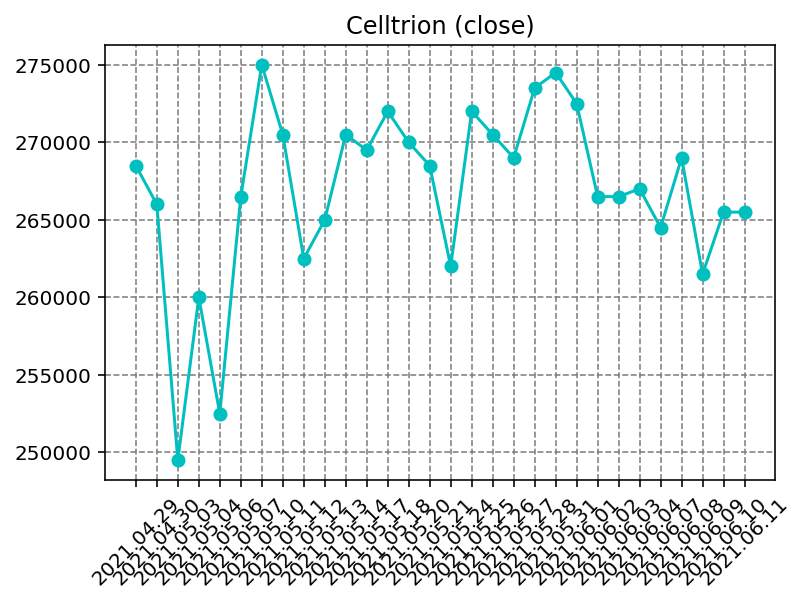

In [26]:
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import requests

# 맨뒤 페이지 숫자 구하기
url = f'https://finance.naver.com/item/sise_day.nhn?code={code}&page=1'
req = requests.get(url, headers={'User-agent' : 'Mozilla/5.0'})
html = BeautifulSoup(req.text, 'lxml')
pgrr = html.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]


# 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+ 1):
    page_url  = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(requests.get(page_url, headers={'user-agent': 'Mozilla/5.0'}).text)[0])   # read_html()함수로 읽은 한 페이지 분량의 데이터 프레임을 df 객체에 추가 한다.


# 차트 출력을 위해 데이터 프레임 가공하기
df = df.dropna()   # 값이 빠진 행을 제거
df = df.iloc[0:30]
df = df.sort_values(by='날짜')

# 날짜, 종가 칼럼으로 차트그리기
plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()





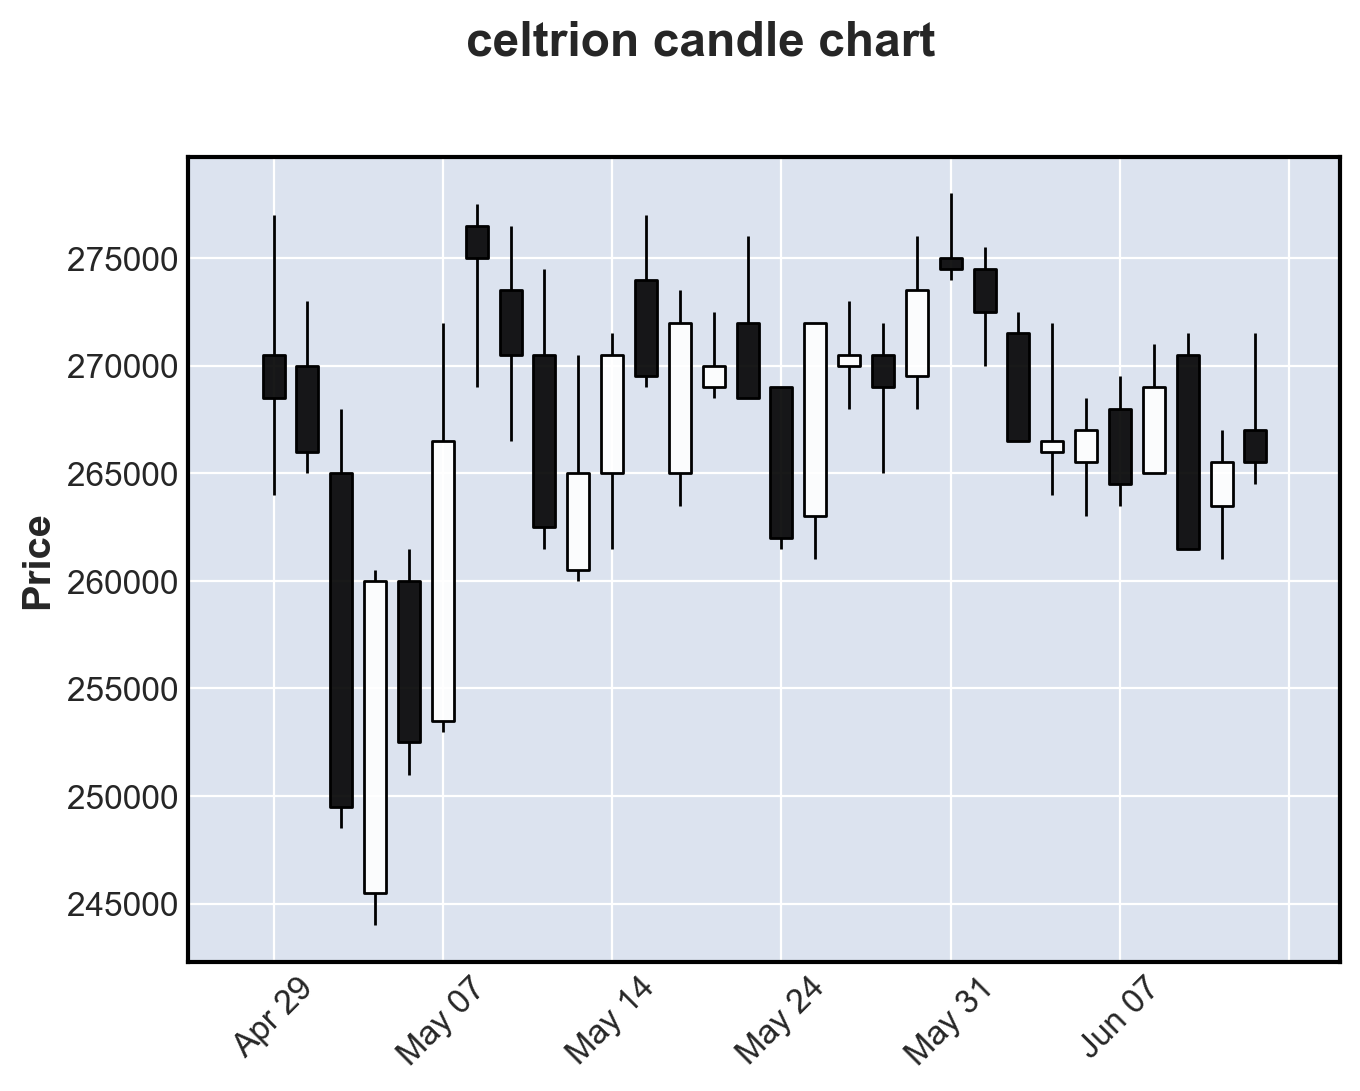

In [3]:
# 캔들 차트 그리기

import pandas as pd
import requests
from bs4 import BeautifulSoup
import mplfinance as mpf


# 맨뒤 페이지 숫자 구하기
code = '068270'
url = f'https://finance.naver.com/item/sise_day.nhn?code={code}&page=1'
req = requests.get(url, headers={'User-agent' : 'Mozilla/5.0'})
html = BeautifulSoup(req.text, 'lxml')
pgrr = html.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]


# 전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+ 1):
    page_url  = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(requests.get(page_url, headers={'user-agent': 'Mozilla/5.0'}).text)[0])   # read_html()함수로 읽은 한 페이지 분량의 데이터 프레임을 df 객체에 추가 한다.


# 차트 출력을 위해 데이터 프레임 가공하기
df = df.dropna()   # 값이 빠진 행을 제거
df = df.iloc[0:30]
df = df.rename(columns={'날짜': 'Date', '시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close', '거래량': 'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 엠피엘파이낸스로 캔들차트 그리기
mpf.plot(df, title="celtrion candle chart", type='candle')





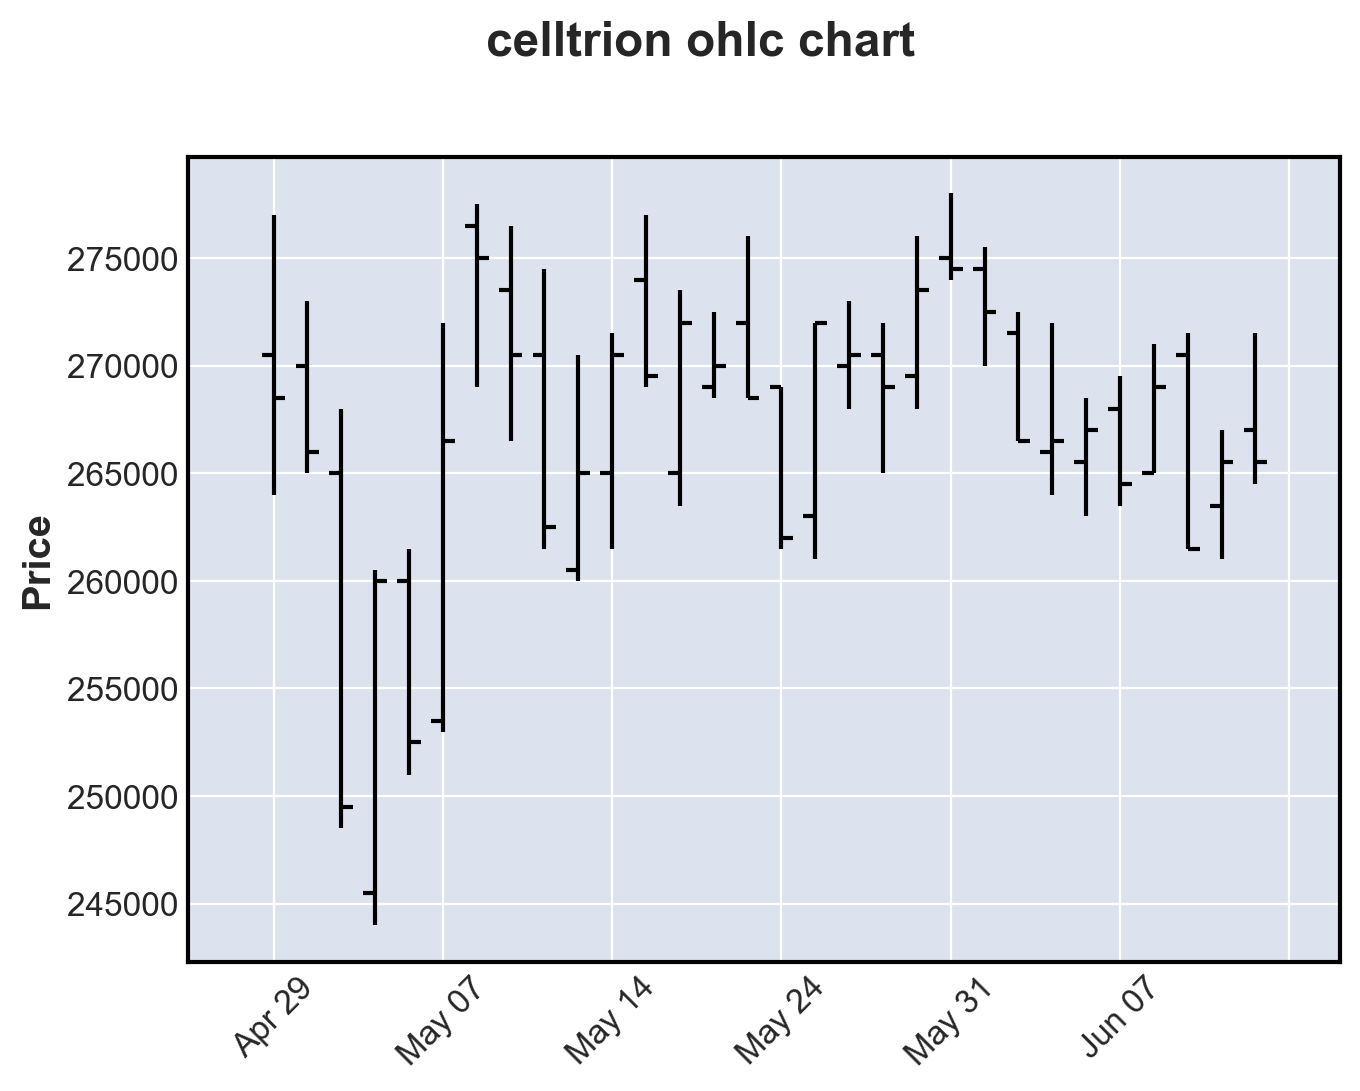

In [4]:
mpf.plot(df, title='celltrion ohlc chart', type='ohlc')

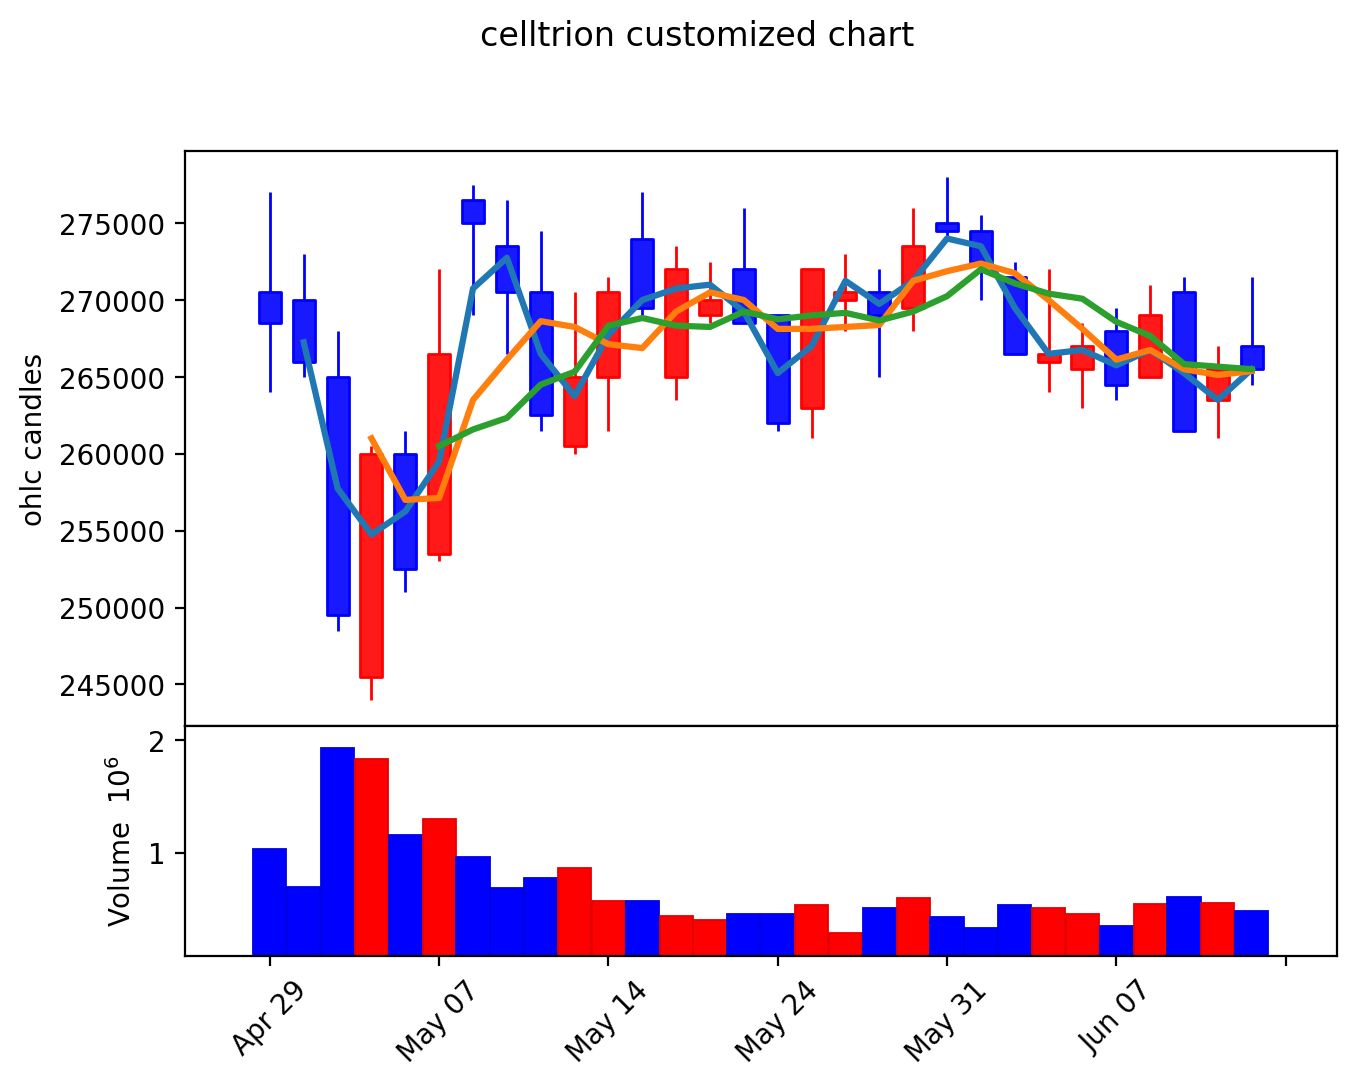

In [6]:
kwargs = dict(title='celltrion customized chart', type='candle',
             mav=(2,4,6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)
